# Uniform-cost search (UCS) or Dijkstra algorithm

UCS enumerates paths until finding the solution, prioritizing those paths with minimum (partial) cost and avoiding cycles.  

UCS generalises BFS to deal with graphs with edges of different costs. 

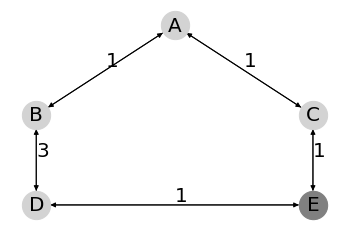

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
G={'A':['B','C'],'B':['A','D'],'C':['A','E'],'D':['B','E'],'E':['C','D']}
W={('A','B'): 1, ('A', 'C'): 4, ('B','A'): 1, ('B','D'): 1, ('C','A'): 4, ('C','E'): 1, ('C','A'): 1, ('D','B'): 3, ('D','E'): 1, ('E','C'): 1,  ('E','D'): 1}
nxG=nx.DiGraph(G)
nx.set_edge_attributes(nxG, values = W, name = 'weight')
source='A'
Target=['E']
pos_nodes = {'A': (20, 300), 'B': (10, 200), 'C': (30, 200), 'D': (10, 100), 'E': (30, 100)}
nx.draw_networkx_edge_labels(nxG, pos=pos_nodes,edge_labels=W,font_size=20,
  horizontalalignment="left",verticalalignment="bottom",rotate=False, label_pos=0.5)
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
nx.draw_networkx_nodes(nxG,pos=pos_nodes, nodelist=Target, node_color='gray', node_size=800)


## UCS algorithm
UCS(G,source)  
> Open = InitHeap(source,0)  
> Closed = $\emptyset$  
> while Open $\neq \emptyset$
>> s = Pop(Open)  
>> if Target(s) return s  
>> Closed = Closed $\cup$ $\{s\}$  
>> for n $\in$ Adjacents(G,s)  
>>>  $g_n$ = $g_s$ + $w(s,n)$  
>>>  if n $\notin$ Closed  
>>>>   if n $\notin$ Open  
>>>>>    Push(Open,n,$g_n$)  
>>>>   else
>>>>>    x = Open[n]  
>>>>>    if $g_n$ < x
>>>>>>    Update(Open,n,$g_n$)  
>>>  else // n $\in$ Closed  
>>>>   x = Closed[n]  
>>>>   if $g_n$ < x  
>>>>>    Delete(Closed[n])  
>>>>>    Push(Open,n,$g_n$)  
> return NULL

### UCS implementation returning the target node that was reached

In [2]:
import heapq
# G is a graph represented as an adjancency list
# W is a dictionary that for each pair of nodes as a tuple returns their cost
# source is the label (string) of the source node
# target is the list of target nodes
def ucs(G, W, source, Target):
  Openh = []; heapq.heappush(Openh,(0,source)); 
  Opend = {}; Opend[source] = 0
  Closed={}
  while Openh != []:
    (gs,s) = heapq.heappop(Openh); del Opend[s]
    if s in Target:
      return s
    Closed[s] = gs
    for n in G[s]:
      gn = gs + W[(s,n)]
      if n not in Closed:
        if n not in Opend:
          heapq.heappush(Openh,(gn,n)); Opend.update({n: gn})
        else:
          x = Opend[n]
          # Existing node with better gn -> update
          if gn < x:
            i = Openh.index((x,n))
            Openh[i] = (gn,n)
            heapq._siftdown(Openh,0,i)
      else:
        x = Closed[n]
        # Existing node with better gn -> update
        if gn < x:
          del Closed[n]
          heapq.heappush(Openh,(gn,n)); Opend.update({n: gn})
          
print(ucs(G,W,source,Target))

E


### UCS implementation graphically showing the sequence of nodes visited

E


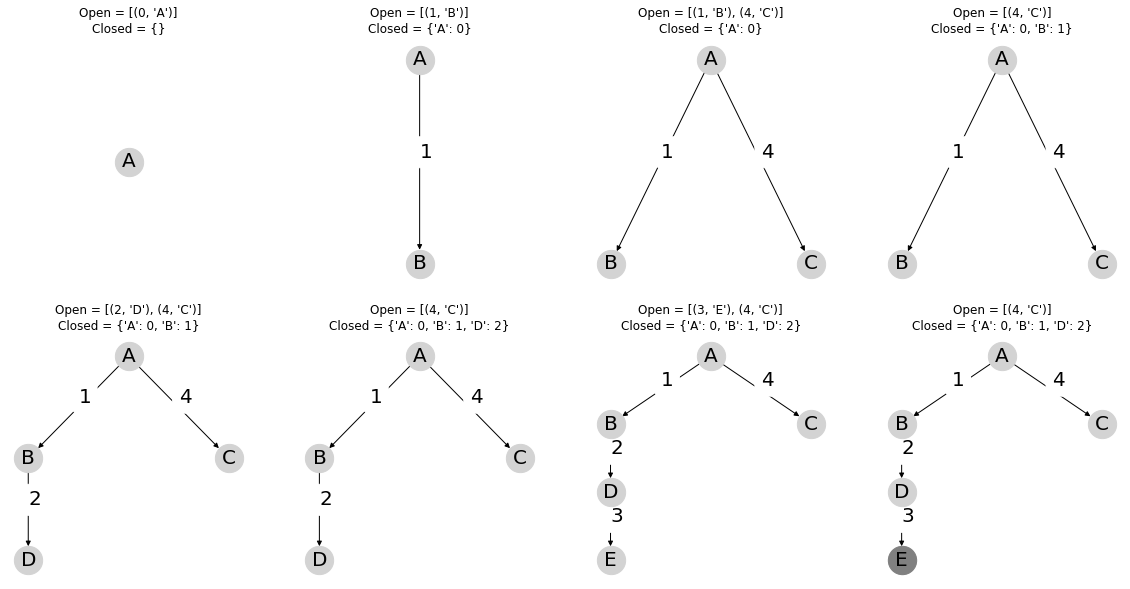

In [4]:
import matplotlib.pyplot as plt

nrows=2; ncols=4
fig, _ = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))
axes = iter(fig.axes)

def draw_graph(DG, DW, source, Open, Closed, target=[]):
  nxDG=nx.DiGraph(DG)
  ax = next(axes)
  ax.set_title("Open = "+str(Open)+"\n"+"Closed = "+str(Closed))
  pos_nodes = nx.nx_agraph.pygraphviz_layout(nxDG, prog='dot', root=source)
  nx.draw(nxDG, pos=pos_nodes, ax=ax, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
  nx.draw_networkx_edge_labels(nxDG, pos=pos_nodes, edge_labels=DW, label_pos=0.5, font_size=20, 
    horizontalalignment="left",verticalalignment="bottom", ax=ax, rotate=False)
  nx.draw_networkx_nodes(nxDG, pos=pos_nodes, nodelist=target, node_color='gray', node_size=800)

import heapq
# G is a graph represented as an adjancency list
# W is a dictionary that for each pair of nodes as a tuple returns their cost
# source is the label (string) of the source node
# target is the list of target nodes
def ucs(G, W, source, Target):
  Openh = []; heapq.heappush(Openh,(0,source)); 
  Opend = {}; Opend[source] = 0
  Closed = {}
  DG = {source:[]}
  DW = {}
  draw_graph(DG, DW, source, Openh, Closed)
  while Openh != []:
    (gs,s) = heapq.heappop(Openh); del Opend[s]
    if s in Target:
      draw_graph(DG, DW, source, Openh, Closed, [s])
      return s
    Closed[s] = gs
    Adj = DG[s]
    for n in G[s]:
      gn = gs + W[(s,n)]
      if n not in Closed:
        if n not in Opend:
          heapq.heappush(Openh,(gn,n)); Opend.update({n: gn})
          Adj.append(n); DG[s]=Adj; DG.update({n:[]}); DW.update({(s,n):gn})
        else:
          x = Opend[n]
          # Existing node with better gn -> update
          if gn < x:
            i = Openh.index((x,n))
            Openh[i] = (gn,n)
            heapq._siftdown(Openh,0,i)
            DW.update({(s,n):gn})
      else:
        x = Closed[n]
        # Existing node with better gn -> update
        if gn < x:
          del Closed[n]
          heapq.heappush(Openh,(gn,n)); Opend.update({n: gn})
      draw_graph(DG, DW, source, Openh, Closed)
          
print(ucs(G,W,source,Target))


BFS would find as path ACE with cost 5, instead of ABDE with cost 3.

UCS stores the minimum cost path between the root node and each generated node traversing generated nodes.  

UCS is optimal, that is, it finds the path with minimum cost, if actions (edge cost) have positive costs  

**Complexity**: 
  
  Explicit graph $G=(V,E)$: $O(\lvert E \rvert \log \lvert V \rvert)$ with a heap
  
  Implicit graph with branching factor $b$:  
    Worst-case scenario: solution at depth $d = \lfloor \frac{C^*}{\epsilon} \rfloor$ where $\epsilon$ is the minimim edge cost and $C^*$ is the minimum path cost. In this case, a complete tree with nodes at depth $d+1$ is generated and the temporal and spatial cost are $O(b^{d+1})$
  
